In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn import metrics
from matplotlib import style
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("Features_Variant_3.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [3]:
# classifying the target variable
np.mean(df.loc[:,'Target'])

7.103668103519464

In [4]:
freq = df['Target'].value_counts()

In [5]:
freq_sorted = freq.sort_index(axis = 0, ascending = True)

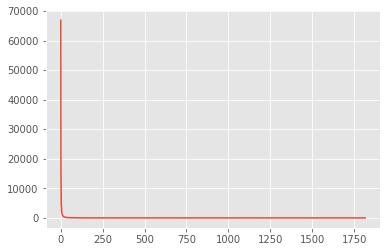

In [6]:
plt.plot(freq_sorted)

In [7]:
df_class = df.copy(deep=True)

In [8]:
# Classifying anything greater than 0 as class 1 and less than as class 0
df_class['TargetClass'] = np.where(df['Target'] > 0 , 1, 0)

In [9]:
df_class.drop(['Target'], axis = 1)

,Likes,Checkin,PageTheme,PageCategory,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,PostPublishedFri,PostPublishedSat,BaseDateTimeSun,BaseDateTimeMon,BaseDateTimeTue,BaseDateTimeWed,BaseDateTimeThu,BaseDateTimeFri,BaseDateTimeSat,TargetClass
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0
5,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,1,0,0,0,0,0
6,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,1,0,0,0
7,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,1,0,0,0,0,0,0,0
8,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,1,0,0
9,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,1,0,0,0,0,0,0


In [10]:
# Selecting 17 features as having the highest significance as per the repository info:

X = df_class.loc[:,['Likes','Checkin','PageTheme','CC1','CC2','CC3','CC4','PostLength','PostShareCount','HLocal','PostPublishSun',
                    'PostPublishedMon','PostPublishedTue','PostPublishedWed','PostPublishedThu','PostPublishedFri','PostPublishedSat',]]
X.head()

,Likes,Checkin,PageTheme,CC1,CC2,CC3,CC4,PostLength,PostShareCount,HLocal,PostPublishSun,PostPublishedMon,PostPublishedTue,PostPublishedWed,PostPublishedThu,PostPublishedFri,PostPublishedSat
0,634995,0,463,0,0,0,0,166,2,24,0,0,0,1,0,0,0
1,634995,0,463,0,0,0,0,132,1,24,0,0,0,0,1,0,0
2,634995,0,463,0,0,0,0,133,2,24,0,0,0,0,0,1,0
3,634995,0,463,7,1,6,7,131,1,24,0,0,0,0,0,1,0
4,634995,0,463,1,0,1,1,142,5,24,0,1,0,0,0,0,0


In [11]:
y = df_class.loc[:,'TargetClass']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TargetClass, dtype: int32

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84768, 17)
(84768,)
(36330, 17)
(36330,)


In [14]:
df.shape

(121098, 54)

In [15]:
scaled_X_train = X_train.copy(deep=True)
scaled_X_test = X_test.copy(deep=True)

In [16]:
#Normalizing
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(scaled_X_train)

In [17]:
#Scaling X_test with the X_train parameters
scaled_X_test = scaler.transform(scaled_X_test)

In [18]:
def print_score1(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [19]:
# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# classifierObj = LogisticRegression(random_state=0)

# from sklearn.model_selection import cross_val_score
# modelAccuracies = cross_val_score(estimator=classifierObj, X=scaled_X_train, y=y_train, cv=3)
# print(modelAccuracies.mean())

In [20]:
# classifierObj.fit(scaled_X_train, y_train)

# #Making predictions on the Test Set
# y_pred_1 = classifierObj.predict(scaled_X_test)
# print(confusion_matrix(y_test,y_pred_1))

# #Model Accuracy
# print(classifierObj.score(scaled_X_test,y_test))

In [21]:
# model1_acc = metrics.accuracy_score(y_test, y_pred_1)

In [22]:
# # Kernel SVM
# rbf_clf = SVC()
# from sklearn.model_selection import cross_val_score
# modelAccuracies = cross_val_score(estimator= rbf_clf, X=scaled_X_train, y=y_train, cv=3)
# print(modelAccuracies.mean())

In [23]:
# rbf_clf.fit(scaled_X_train, y_train)
# y_pred_2 = rbf_clf.predict(scaled_X_test)
# print(confusion_matrix(y_test,y_pred_2))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

In [24]:
# model2_acc = metrics.accuracy_score(y_test, y_pred_2)

In [25]:
# Linear SVM
clf = SVC(kernel='linear', C= 1)
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred_3 = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_3))
print(classification_report(y_test,y_pred_3))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))


[[18833  1254]
 [ 5937 10306]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     20087
           1       0.89      0.63      0.74     16243

    accuracy                           0.80     36330
   macro avg       0.83      0.79      0.79     36330
weighted avg       0.82      0.80      0.80     36330

Accuracy: 0.8020644095788605


In [26]:
model3_acc = metrics.accuracy_score(y_test, y_pred_3)
model3_confusion = confusion_matrix(y_test,y_pred_3)

In [27]:
print(model3_acc)
print(model3_confusion)

0.8020644095788605
[[18833  1254]
 [ 5937 10306]]


In [28]:
# Cross validation using SVM
def poly_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='poly', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

P_score1 = poly_svm(scaled_X_train, y_train, 2)
print(np.mean(P_score1['train_score']))
print(np.mean(P_score1['test_score']))
P_score2 = poly_svm(scaled_X_train, y_train, 3)
print(np.mean(P_score2['train_score']))
print(np.mean(P_score2['test_score']))
P_score3 = poly_svm(scaled_X_train, y_train, 4)
print(np.mean(P_score3['train_score']))
print(np.mean(P_score3['test_score']))

0.6578897523266721
0.6572645894443597
0.7698483053288613
0.7667988327178538
0.7640442211156465
0.7591661995993121


In [29]:
print(np.mean(P_score1['test_score']))
print(np.mean(P_score2['test_score']))
print(np.mean(P_score3['test_score']))

0.6572645894443597
0.7667988327178538
0.7591661995993121


In [30]:
total_train_acc = []
total_train_acc.append(np.mean(P_score1['train_score']))
total_train_acc.append(np.mean(P_score2['train_score']))
total_train_acc.append(np.mean(P_score3['train_score']))
print(total_train_acc)

total_test_acc = []
total_test_acc.append(np.mean(P_score1['test_score']))
total_test_acc.append(np.mean(P_score2['test_score']))
total_test_acc.append(np.mean(P_score3['test_score']))
print(total_test_acc)


[0.6578897523266721, 0.7698483053288613, 0.7640442211156465]
[0.6572645894443597, 0.7667988327178538, 0.7591661995993121]


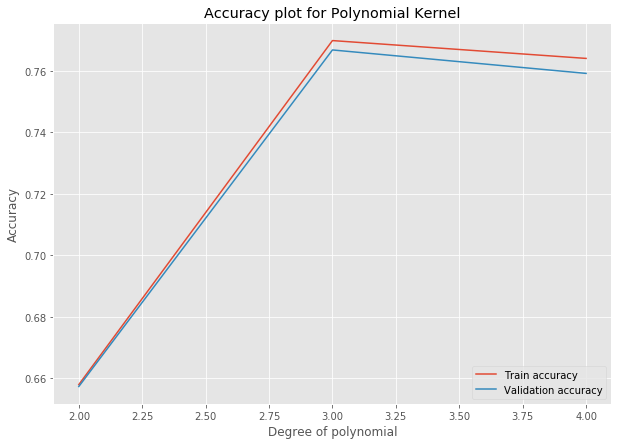

In [31]:
plt.figure(figsize=(10,7))
plt.title('Accuracy plot for Polynomial Kernel')
plt.xlabel('Degree of polynomial')
plt.ylabel('Accuracy')
c = [2,3,4]
plt.plot(c,total_train_acc, label='Train accuracy')
plt.plot(c,total_test_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')

In [32]:
# Polynomial kernel
poly_clf = SVC(kernel='poly', degree = 3)
poly_clf.fit(scaled_X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred_4 = poly_clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_4))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))

[[19184   903]
 [ 7294  8949]]
Accuracy: 0.774373795761079


In [34]:
model4_acc = metrics.accuracy_score(y_test, y_pred_4)
model4_confusion = confusion_matrix(y_test,y_pred_4)

In [35]:
# Cross validation using SVM
def sig_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='sigmoid', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

S_score1 = sig_svm(scaled_X_train, y_train, 0.0001)
print(np.mean(S_score1['train_score']))
print(np.mean(S_score1['test_score']))
S_score2 = sig_svm(scaled_X_train, y_train, 0.1)
print(np.mean(S_score2['train_score']))
print(np.mean(S_score2['test_score']))
S_score3 = sig_svm(scaled_X_train, y_train, 1)
print(np.mean(S_score3['train_score']))
print(np.mean(S_score3['test_score']))

0.7182958224583142
0.7181247938854735
0.7182958224583142
0.7181247938854735
0.7182958224583142
0.7181247938854735


In [36]:
print(np.mean(S_score1['test_score']))
print(np.mean(S_score2['test_score']))
print(np.mean(S_score3['test_score']))

0.7181247938854735
0.7181247938854735
0.7181247938854735


In [37]:
sig_clf = SVC(kernel='sigmoid', C=1).fit(scaled_X_train, y_train)

In [38]:
y_pred_5 = sig_clf.predict(scaled_X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_5))
print(confusion_matrix(y_test,y_pred_5))

Accuracy: 0.7159097164877511
[[14901  5186]
 [ 5135 11108]]


In [39]:
model5_acc = metrics.accuracy_score(y_test, y_pred_5)
model5_confusion = confusion_matrix(y_test,y_pred_5)

In [40]:
np.unique(y_train)

array([0, 1])

In [41]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator= NB, X=scaled_X_train, y=y_train, cv=3)
print(modelAccuracies.mean())

0.7306765370356837


In [42]:
NB.fit(scaled_X_train, y_train)

#Making predictions on the Test Set
y_pred_6 = NB.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_6))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_6))

[[19245   842]
 [ 8902  7341]]
Accuracy: 0.7317919075144509


In [43]:
model6_acc = metrics.accuracy_score(y_test, y_pred_6)

In [44]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [45]:
def diff_dep(X_train, y_train, depth, criteria):
    if criteria == True:
        classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
        classifier.fit(X_train,y_train)
    elif criteria == False:
        classifier = DecisionTreeClassifier(criterion='gini', random_state=44, max_depth=depth)
        classifier.fit(X_train, y_train)
    return classifier

In [46]:
# Classification Trees using Information Gain approach
if_classifier = diff_dep(scaled_X_train, y_train, 3, True)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 5, True)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 10, True)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

Training results:

Accuracy Score: 0.8082

Confusion Matrix:
[[41788  5013]
 [11243 26724]]

Average Accuracy for Train data:	0.8082

Average Accuracy for Validation data :	0.8082


Test results:

Accuracy Score: 0.8124

Confusion Matrix:
[[17998  2089]
 [ 4725 11518]]


 ***************************************** 

Training results:

Accuracy Score: 0.8150

Confusion Matrix:
[[40557  6244]
 [ 9437 28530]]

Average Accuracy for Train data:	0.8151

Average Accuracy for Validation data :	0.8150


Test results:

Accuracy Score: 0.8194

Confusion Matrix:
[[17479  2608]
 [ 3955 12288]]


 ***************************************** 

Training results:

Accuracy Score: 0.8339

Confusion Matrix:
[[41054  5747]
 [ 8332 29635]]

Average Accuracy for Train data:	0.8347

Average Accuracy for Validation data :	0.8150


Test results:

Accuracy Score: 0.8203

Confusion Matrix:
[[17353  2734]
 [ 3794 12449]]



In [47]:
if_model_acc = test_acc21
if_res = res20

<Figure size 432x288 with 0 Axes>

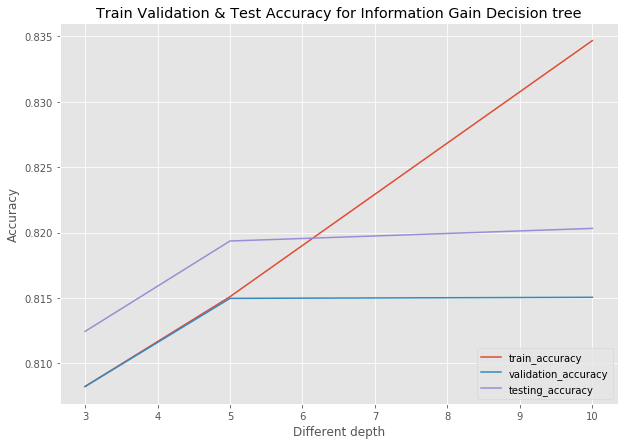

In [48]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Information Gain Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Different depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_TVT_GainDTree')

In [49]:
# Classification Trees using GINI Index approach
gini_classifier = diff_dep(scaled_X_train, y_train, 3, False)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 5, False)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 10, False)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

Training results:

Accuracy Score: 0.8082

Confusion Matrix:
[[41788  5013]
 [11243 26724]]

Average Accuracy for Train data:	0.8083

Average Accuracy for Validation data :	0.8078


Test results:

Accuracy Score: 0.8124

Confusion Matrix:
[[17998  2089]
 [ 4725 11518]]


 ***************************************** 

Training results:

Accuracy Score: 0.8167

Confusion Matrix:
[[41974  4827]
 [10707 27260]]

Average Accuracy for Train data:	0.8166

Average Accuracy for Validation data :	0.8145


Test results:

Accuracy Score: 0.8193

Confusion Matrix:
[[18056  2031]
 [ 4534 11709]]


 ***************************************** 

Training results:

Accuracy Score: 0.8382

Confusion Matrix:
[[41733  5068]
 [ 8646 29321]]

Average Accuracy for Train data:	0.8395

Average Accuracy for Validation data :	0.8168


Test results:

Accuracy Score: 0.8198

Confusion Matrix:
[[17570  2517]
 [ 4029 12214]]



In [50]:
gini_model_acc = test_acc21
gini_res = res20

<Figure size 432x288 with 0 Axes>

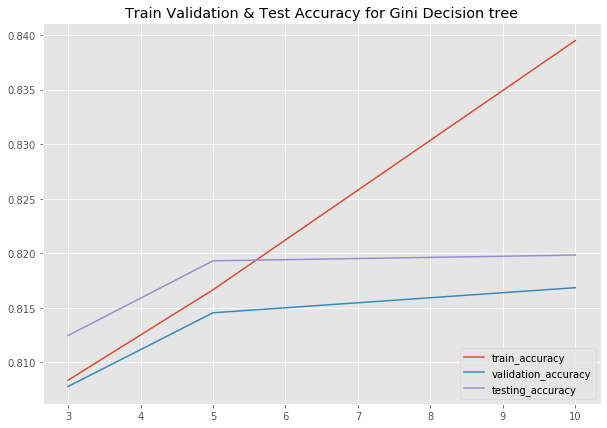

In [51]:
# Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Gini Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.legend(loc='lower right')

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(scaled_X_train,y_train)

#Making predictions on the Test Set
y_pred_rf = rf.predict(scaled_X_test)

In [69]:
model_rf = metrics.accuracy_score(y_test, y_pred_rf)
print(confusion_matrix(y_test,y_pred_rf))
print(model_rf)

[[17983  2104]
 [ 3750 12493]]
0.8388659510046793


In [52]:
#Boosting algorithm Implementation
from sklearn.ensemble import AdaBoostClassifier

In [53]:
def depth_boost(X_train, y_train, depth):
    classifier = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=depth))
    classifier.fit(X_train,y_train)
    return classifier

In [54]:
# AdaBOOST 
boost_classifier = depth_boost(scaled_X_train, y_train, 3)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 5)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 10)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)


Training results:

Accuracy Score: 0.8275

Confusion Matrix:
[[41102  5699]
 [ 8926 29041]]

Average Accuracy for Train data:	0.8278

Average Accuracy for Validation data :	0.8217


Test results:

Accuracy Score: 0.8266

Confusion Matrix:
[[17587  2500]
 [ 3801 12442]]


 ****************************************************** 

Training results:

Accuracy Score: 0.5522

Confusion Matrix:
[[46801     0]
 [37960     7]]

Average Accuracy for Train data:	0.8439

Average Accuracy for Validation data :	0.8188


Test results:

Accuracy Score: 0.5530

Confusion Matrix:
[[20087     0]
 [16239     4]]


 ****************************************************** 

Training results:

Accuracy Score: 0.5562

Confusion Matrix:
[[46801     0]
 [37619   348]]

Average Accuracy for Train data:	0.9834

Average Accuracy for Validation data :	0.8108


Test results:

Accuracy Score: 0.5573

Confusion Matrix:
[[20086     1]
 [16084   159]]



In [55]:
boost_model_acc = test_acc21
boost_res = res20

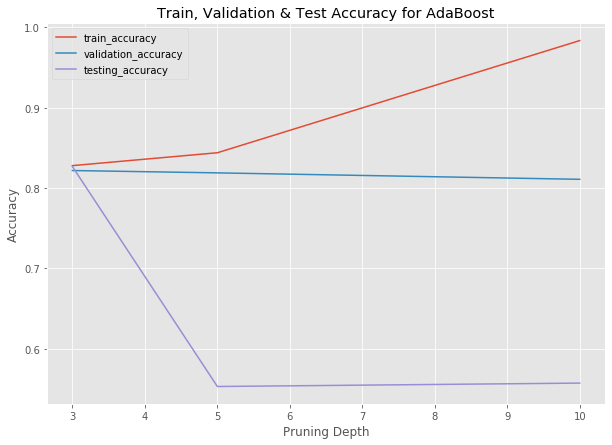

In [56]:
#Plotting the curves of training and test across different depths 

plt.figure(figsize=(10,7))
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.title("Train, Validation & Test Accuracy for AdaBoost")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Pruning Depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.savefig('Dataset1_TVTAdaboost')

In [57]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(scaled_X_train, y_train)

In [58]:
y_pred_xg = xgb_clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_xg))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xg))

[[17743  2344]
 [ 4013 12230]]
Accuracy: 0.8250206440957886


In [59]:
model_xgb = metrics.accuracy_score(y_test, y_pred_xg)

Text(0.5, 1.0, 'Comparison of Accuracy between all the Algorithms')

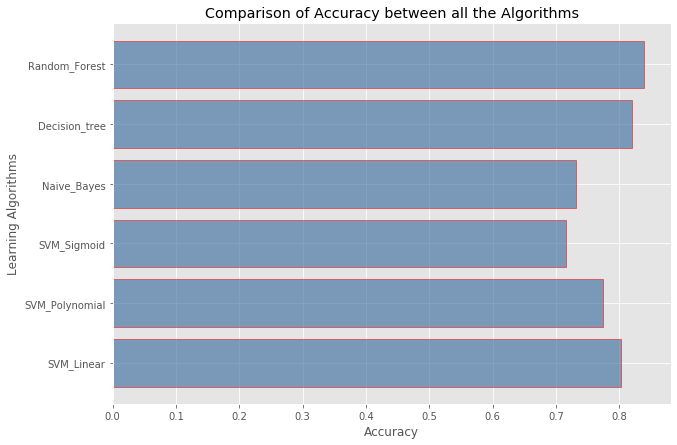

In [73]:
accuracy=[model3_acc,model4_acc,model5_acc,model6_acc,if_model_acc,model_rf]
Functions=['SVM_Linear','SVM_Polynomial','SVM_Sigmoid','Naive_Bayes','Decision_tree','Random_Forest']
plt.figure(figsize=(10,7))
plt.barh(Functions,accuracy,color= (0.2, 0.4, 0.6, 0.6), edgecolor = 'red')
plt.xlabel("Accuracy")
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")

Text(0.5, 1.0, 'Comparison of Accuracy between Boosting Techniques')

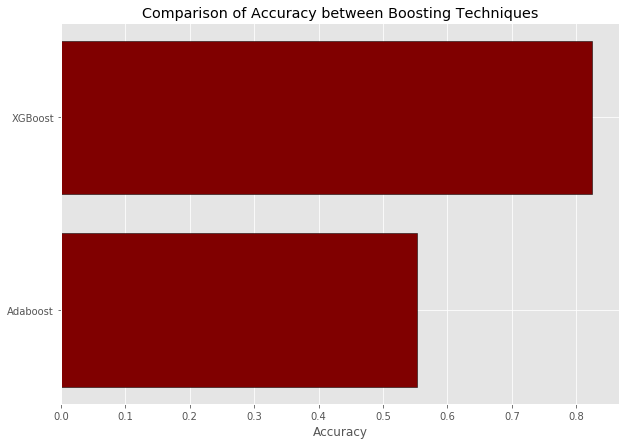

In [83]:
accuracy=[boost_model_acc,model_xgb]
Functions=['Adaboost','XGBoost']
plt.figure(figsize=(10,7))
plt.barh(Functions,accuracy,color= ['maroon'], edgecolor = 'black')
plt.xlabel("Accuracy")
plt.title("Comparison of Accuracy between Boosting Techniques")

<b> The End. Thank You :)